<div class='alert alert block alert-info'>Q.1: a gas is made up of the following commponents; 25 lb of methane , 3 lb of ethane and 1.5lb if propane.  
 express the composition of the gas in mole fraction(%). given atomic weight of carbon is 12 and for hydrogen it is 1. </div>   


|    | composition   |   molecular_weight |   given_weight |
|---:|:--------------|-------------------:|---------------:|
|  0 | methane       |                 16 |           25   |
|  1 | ethane        |                 30 |            3   |
|  2 | propane       |                 44 |            1.5 |

In [6]:
import pandas as pd
import numpy as np
Composition=['methane', 'ethane', 'propane']
molecular_weight = [16, 30, 44]
given_weight = [25, 3, 1.5]
df = pd.DataFrame({'composition':Composition, 'molecular_weight(M)':molecular_weight, 'given_weight(m)':given_weight})
df

,composition,molecular_weight(M),given_weight(m)
0,methane,16,25.0
1,ethane,30,3.0
2,propane,44,1.5


mole(n) = (m/M)

In [8]:
df['mole'] = df['given_weight(m)']/df['molecular_weight(M)']
sum = df['mole'].sum()
print(sum)
df

1.6965909090909093


,composition,molecular_weight(M),given_weight(m),mole
0,methane,16,25.0,1.562500
1,ethane,30,3.0,0.100000
2,propane,44,1.5,0.034091


In [10]:
df['mole_fraction , %'] = df['mole'] *100/sum
df

,composition,molecular_weight(M),given_weight(m),mole,mole_fraction,"mole_fraction , %"
0,methane,16,25.0,1.562500,0.920965,92.096450
1,ethane,30,3.0,0.100000,0.058942,5.894173
2,propane,44,1.5,0.034091,0.020094,2.009377


In [13]:
print(f"sum of mole fraction is: {df['mole_fraction , %'].sum()} %")

sum of mole fraction is: 99.99999999999999 %


<div class='alert alert block alert-info'>
    Q.2: calculate: <br>  
(a). gas deviation factor (gas  compressibility factor)  <br>
(b). specific gravity   <br>
(c). gas density at 2000 psia and 130 F and standard condition.  <br>    
(d). specific volume at 2000 psia and 130 F  <br>
(e). Apparent Molecular weight    <br>
(f). Gas Formation volume factor<br>
(g). gas expantion volume factor   <br>

given table: </div>

|    | composition   |   mole_fraction(n), % |   critical_pressure $P_{pci}$ , psia |   critical_temperature $T_{pci} $, °R  |
|---:|:--------------|----------------------:|-------------------------------------:|---------------------------------------:|
|  0 | methane       |                  90   |                                666.4 |                                 343.33 |
|  1 | ethane        |                   7.5 |                                706.5 |                                 549.92 |
|  2 | propane       |                   2.5 |                                616.4 |                                 666.06 |
|  3 | butane        |                   1   |                                527.9 |                                 734.46 


In [74]:
Composition=['methane', 'ethane', 'propane', 'butane']
mole_fraction = [90, 7.5, 2.5, 1]
critical_pressure = [666.4, 706.5, 616.4, 527.9]
critical_temperature = [343.33, 549.92,666.06, 734.46]
df = pd.DataFrame({'composition':Composition, 'mole_fraction(n), %':mole_fraction, 
                   'critical_pressure $P_{pci}$ , psia':critical_pressure ,'critical_temperature $T_{pci} $, \N{DEGREE SIGN}R ':critical_temperature })
#print(df.to_markdown())
df

,composition,"mole_fraction(n), %","critical_pressure $P_{pci}$ , psia","critical_temperature $T_{pci} $, °R"
0,methane,90.0,666.4,343.33
1,ethane,7.5,706.5,549.92
2,propane,2.5,616.4,666.06
3,butane,1.0,527.9,734.46


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   composition                           4 non-null      object 
 1   mole_fraction(n), %                   4 non-null      float64
 2   critical_pressure $P_{pci}$ , psia    4 non-null      float64
 3   critical_temperature $T_{pci} $, °R   4 non-null      float64
dtypes: float64(3), object(1)
memory usage: 256.0+ bytes


<div class='alert alert block alert-success'>
# Formula:

<strong>Gas Compressibility Factor (Gas Deviation Factor): </strong>
$$ Z = {V_{actual}/{V_{ideal}}}$$

<strong>Pseudo Reduce Pressure: </strong>
$$ P_{pr} = {P}/{P_{pc}}$$

<strong>Pseudo Reduce Temperature: </strong>
$$ T_{pr} = {T}/{T_{pc}}$$

` here we will calculate Z using graph '

<strong>Apparent Molecular Mass, lb:</strong>

$$ Ma = {{mole\ fraction(n)*Molecular\ Mass(M)}} $$ 

<strong>specific gravity for gas: </strong>

$$ specific\ gravity= Ma/28.97$$


<strong>Gas Density for gas, (lb/$ft^{3}$): </strong>

$$ gas\ density ={(P*Ma)}/{(Z*R*T) }$$


<strong>Specific Volume ($ft^{3}$/lb): </strong>
$$ V_{specific\ volume} = 1/{gas\ density}$$

<strong>Gas Formation Volume Factor, ($ft^{3}$/SCF): </strong>
$$ B_{gas} = (0.02827*Z*Temperature/Pessure)$$

<strong>Gas Expantion Factor, (SCF/$ft^{3}$) </strong>
$$ E_{gas} = 1/{B_{gas} }$$
</div>

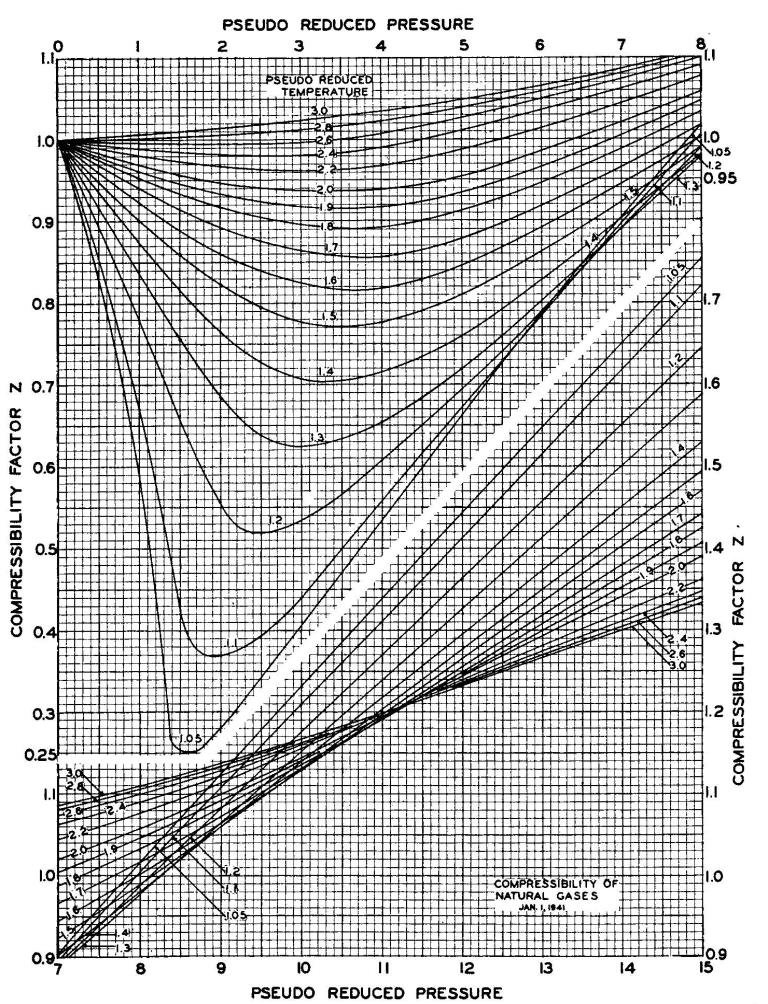

 Here we can see we needed pseudo reduce pressure and Pseudo reduce temperature

In [50]:
df['$P_{pc}$'] = df['critical_pressure $P_{pci}$ , psia']*df["mole_fraction(n), %"]/100
df['$T_{pc}$'] = df['critical_temperature $T_{pci} $, \N{DEGREE SIGN}R ']*df["mole_fraction(n), %"]/100
df['Molecular_weight'] = [16,30, 44, 58]
df['Apparent_Molecular_weight'] = df['Molecular_weight']*df["mole_fraction(n), %"]/100
df

,composition,"mole_fraction(n), %","critical_pressure $P_{pci}$ , psia","critical_temperature $T_{pci} $, °R",$P_{pc}$,$T_{pc}$,Molecular_weight,Apparent_Molecular_weight
0,methane,90.0,666.4,343.33,599.7600,308.9970,16,14.40
1,ethane,7.5,706.5,549.92,52.9875,41.2440,30,2.25
2,propane,2.5,616.4,666.06,15.4100,16.6515,44,1.10
3,butane,1.0,527.9,734.46,5.2790,7.3446,58,0.58


In [42]:
P_pc = df['$P_{pc}$'].sum()
T_pc = df['$T_{pc}$'].sum()
P_pc, T_pc

(673.4364999999999, 374.2371)

In [44]:
# temperature in rankine R = F + 460
P = 2000
T = (460+150)
P_pr = P/P_pc
T_pr = T/T_pc
P_pr, T_pr

(2.969841996981156, 1.6299827034786236)

` (a). By seeing value at p_pr at 2.97 and T_pr at 1.62 we got Z = .83`

In [52]:
apparent_molecular_weight = df['Apparent_Molecular_weight'].sum()

In [63]:
Z = .83
R = 10.73
specific_gravity = apparent_molecular_weight/28.97

gas_density_reservoir = (P*apparent_molecular_weight)/(Z*R*T)

gas_density_standard = (14.69*apparent_molecular_weight)/(Z*520)

specific_volume = 1/gas_density_reservoir

gas_formation_volume_factor = (.02827*Z*T)/P

gas_expantion_factor = 1/gas_formation_volume_factor

In [66]:
def output(a,b,c,d,e, f, g,h):
    print('1. gas compressibility factor : ',a ,'\n'
         '2. apparent molecular weight , lb: ', b, '\n'
         '3. specific gravity : ',c ,'\n'
         '4. gas density at reservoir condition , (lb/$ft^{3}$) : ', d, '\n'
         '5. gas density at standard condition , (lb/SCF) : ',e ,'\n'
         '6. specific volume, ($ft_{3}$/lb) : ', f, '\n'
         '7. gas formation volume factor , ($ft^{3}$/SCF) : ',g ,'\n'
         '8. gas expantion factor, (SCF/$ft^{3}$) : ', h, '\n')

In [67]:
output(Z,apparent_molecular_weight,specific_gravity,gas_density_reservoir,gas_density_standard,specific_volume, gas_formation_volume_factor, gas_expantion_factor)

1. gas compressibility factor :  0.83 
2. apparent molecular weight , lb:  18.33 
3. specific gravity :  0.6327235070762858 
4. gas density at reservoir condition , (lb/$ft^{3}$) :  6.7481512992216075 
5. gas density at standard condition , (lb/SCF) :  0.623882530120482 
6. specific volume, ($ft_{3}$/lb) :  0.14818873431533003 
7. gas formation volume factor , ($ft^{3}$/SCF) :  0.0071565505 
8. gas expantion factor, (SCF/$ft^{3}$) :  139.73212373754646 



<div class='alert alert block alert-info'>
Q.3 In question 2, if reservoir has an areal size of 5 miles by 2 miles and 200 ft thick. The average porosity is 20 % 
and there is no water present . how much gas is stored at standard condition.(1 mile = 5280 ft)</div>

In [73]:
A = 5*5280*2*5280
H = 200
porosity = .2
volume_of_gas_at_reservoir_condition = A*H*porosity

gas_volume_at_standard_condition = volume_of_gas_at_reservoir_condition/gas_formation_volume_factor
print(f'gas stored at surface condition is {gas_volume_at_standard_condition/10**9} MMM $ft^{3}$')

gas stored at surface condition is 1558.203215361926 MMM $ft^3$
